In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd

In [2]:
sales_df = pd.read_csv('2010_sales.csv', parse_dates=['Date'])
sales_df

,Date,Quantity
0,2016-01-01,42
1,2016-02-01,17
2,2016-03-01,46
3,2016-04-01,66
4,2016-05-01,41
5,2016-06-01,54
6,2016-07-01,107
7,2016-08-01,134
8,2016-09-01,162
9,2016-10-01,133


In [3]:
sales_df.columns = ['ds', 'y']
type(sales_df.ds[0])

pandas._libs.tslib.Timestamp

In [4]:
sales_df.head()

,ds,y
0,2016-01-01,42
1,2016-02-01,17
2,2016-03-01,46
3,2016-04-01,66
4,2016-05-01,41


In [5]:
# perform log transform the data to convert
# non-stationary date to stationary
sales_df['y_orig']=sales_df['y']
sales_df['y'] = np.log(sales_df['y'])
sales_df.head()

,ds,y,y_orig
0,2016-01-01,3.737670,42
1,2016-02-01,2.833213,17
2,2016-03-01,3.828641,46
3,2016-04-01,4.189655,66
4,2016-05-01,3.713572,41


In [6]:
model = Prophet()
model.fit(sales_df);

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 11.0.


In [7]:
future_data = model.make_future_dataframe(periods=6, freq='m')
forecast_data = model.predict(future_data)

In [8]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
16,2017-04-30,5.867176,5.515289,6.253653
17,2017-05-31,6.019564,5.660363,6.394005
18,2017-06-30,6.167038,5.793055,6.508930
19,2017-07-31,6.319427,5.962157,6.682196
20,2017-08-31,6.471816,6.120459,6.857212


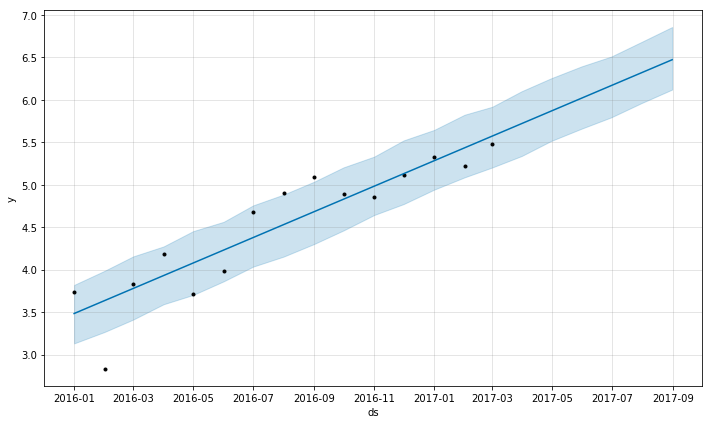

In [9]:
model.plot(forecast_data)

In [10]:
model.plot_components(forecast_data)

TypeError: zip argument #1 must support iteration

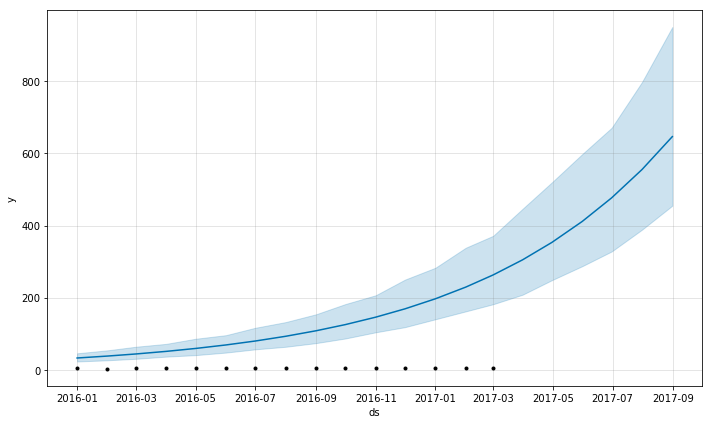

In [11]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])
model.plot(forecast_data_orig)

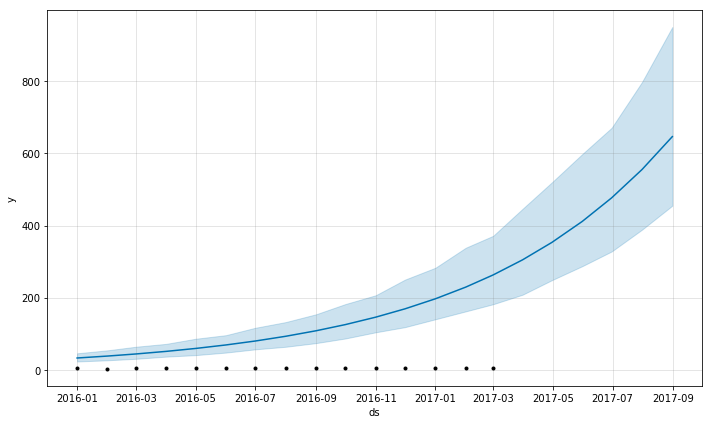

In [12]:
#copy the log-transformed data to another column
sales_df['y_log'] = sales_df['y']
#copy the original data to 'y'
sales_df['y'] = sales_df['y_orig']
model.plot(forecast_data_orig)

In [13]:
forecast_data.to_excel('forecast_data_2010.xlsx')